In [5]:
res = 'suction-based-grasping/convnet/demo/test-results.h5'

In [6]:
res = 'suction-based-grasping/convnet/demo/test-results.h5'
import h5py
f = h5py.File(res, 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
data = list(f[a_group_key])

Keys: [u'results']


In [7]:
import numpy as np
a = np.array(f['results'])

In [8]:
import matplotlib.pyplot as plt
img = a[0]

In [9]:
img = np.transpose(img, [1,2,0])

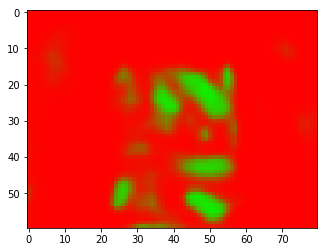

In [10]:
plt.imshow(img)
plt.show()

In [42]:
img.shape

(60, 80, 3)

In [25]:
import cv2

In [26]:
%matplotlib inline

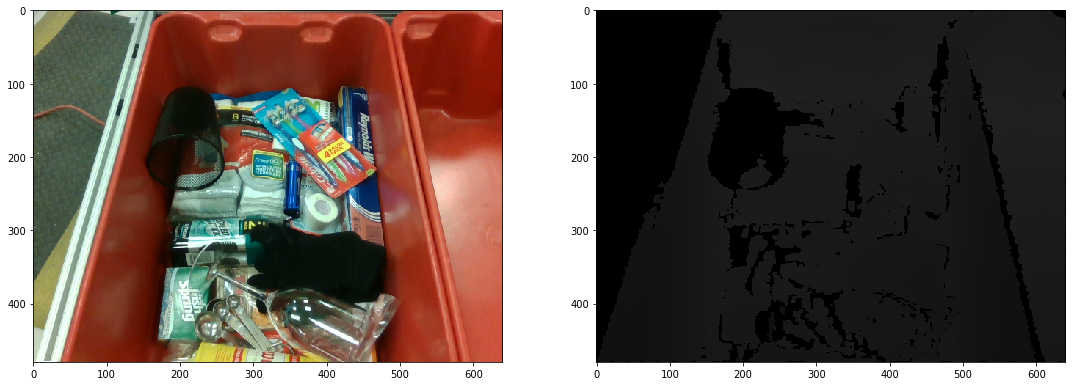

In [40]:
f, ax = plt.subplots(1,2)
im_col = cv2.imread('suction-based-grasping/convnet/demo/test-image.color.png')
im_dep = cv2.imread('suction-based-grasping/convnet/demo/test-image.depth.png')
ax[0].imshow(im_col[...,::-1])
ax[1].imshow(im_dep[...,::-1])
f.set_size_inches(18.5, 10.5)

In [44]:
col = cv2.resize(im_col, (80, 60))
img_255 = (img * 255).astype(np.uint8)
bled_label_img = cv2.addWeighted(col, 0.7, img_255, 0.3, 0)

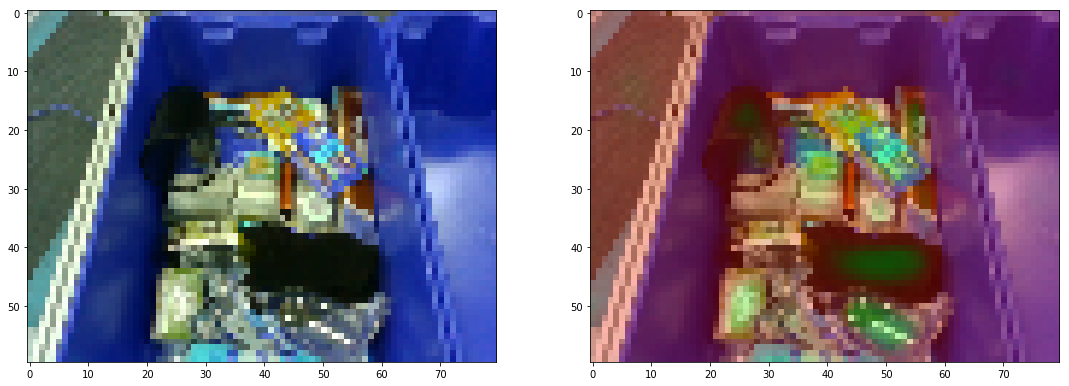

In [64]:
f, ax = plt.subplots(1,2)
ax[0].imshow(col)
ax[1].imshow(bled_label_img)
f.set_size_inches(18.5, 10.5)

In [69]:
img_re = cv2.resize(img, (640, 480))
img_re_255 = (img_re * 255).astype(np.uint8)
bled_label_img = cv2.addWeighted(im_col, 0.5, img_re_255, 0.5, 0)

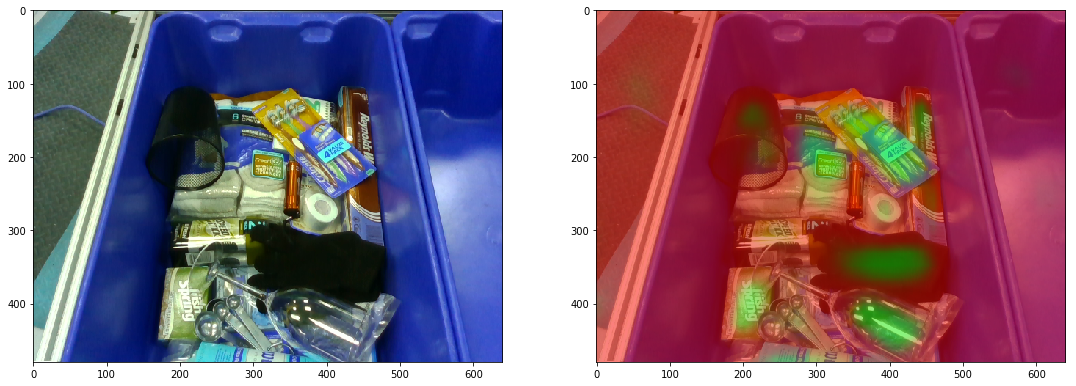

In [70]:
f, ax = plt.subplots(1,2)
ax[0].imshow(im_col)
ax[1].imshow(bled_label_img)
f.set_size_inches(18.5, 10.5)

In [71]:
res = 'suction-based-grasping/convnet/demo/results-new.h5'
import h5py
f = h5py.File(res, 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
data = list(f[a_group_key])

Keys: [u'results']


In [72]:
import numpy as np
a = np.array(f['results'])

In [73]:
import matplotlib.pyplot as plt
img = a[0]

In [74]:
img = np.transpose(img, [1,2,0])

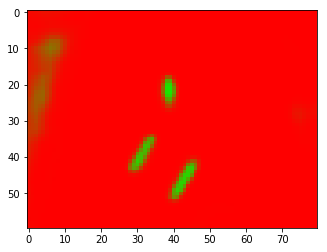

In [75]:
plt.imshow(img)
plt.show()

In [76]:
img.shape

(60, 80, 3)

In [77]:
import cv2

In [78]:
%matplotlib inline

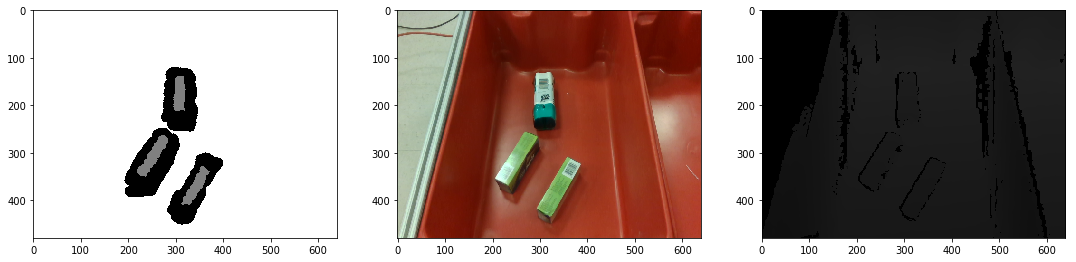

In [79]:
f, ax = plt.subplots(1,3)
l = cv2.imread('/home/jakub/arc-robot-vision/suction-based-grasping/data/label/000000-0.png')
im_col = cv2.imread('/home/jakub/arc-robot-vision/suction-based-grasping/data/color-input/000000-0.png')
im_dep = cv2.imread('/home/jakub/arc-robot-vision/suction-based-grasping/data/depth-input/000000-0.png')
ax[0].imshow(l[...,::-1])
ax[1].imshow(im_col[...,::-1])
ax[2].imshow(im_dep[...,::-1])
f.set_size_inches(18.5, 10.5)

In [80]:
img_re = cv2.resize(l, (640, 480))
img_re_255 = (img_re * 255).astype(np.uint8)
bled_label_img = cv2.addWeighted(im_col, 0.5, img_re_255, 0.5, 0)

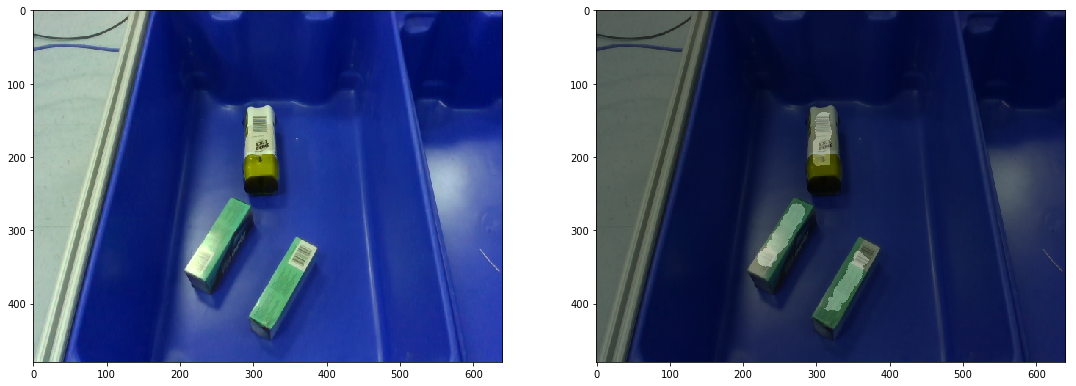

In [81]:
f, ax = plt.subplots(1,2)
ax[0].imshow(im_col)
ax[1].imshow(bled_label_img)
f.set_size_inches(18.5, 10.5)